In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('downloads/epirecipes/epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

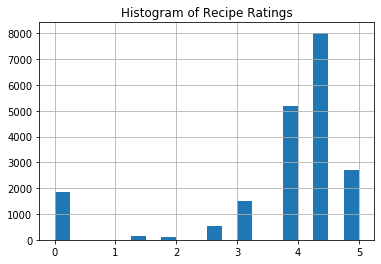

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [7]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 
                   'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

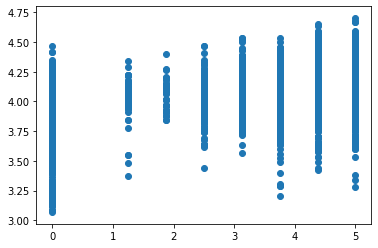

In [8]:
plt.scatter(Y, svr.predict(X))

In [9]:
svr.score(X, Y)

-0.003978314483867873

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here.

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.



In [10]:
raw_data.drop ([ 'alabama','alaska', 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisket',
 'broccoli',
 'broccoli rabe',
 'broil',
 'brooklyn',
 'brown rice',
 'brownie',
 'brunch',
 'brussel sprout',
 'buffalo',
 'buffet',
 'bulgaria',
 'bulgur',
 'burrito',
 'butter',
 'buttermilk',
 'butternut squash',
 'butterscotch/caramel',
 'cabbage',
 'cake',
 'california',
 'calvados',
 'cambridge',
 'campari',
 'camping',
 'canada',
 'candy',
 'candy thermometer',
 'cantaloupe',
 'capers',
 'caraway',
 'cardamom',
 'carrot',
 'cashew',
 'casserole/gratin',
 'cauliflower',
 'caviar',
 'celery',
 'chambord',
 'champagne',
 'chard',
 'chartreuse',
 'cheddar',
 'cheese',
 'cherry',
 'chestnut',
 'chicago',
 'chicken',
 'chickpea',
 'chile',
 'chile pepper',
 'chili',
 'chill',
 'chive',
 'chocolate',
 'christmas',
 'christmas eve',
 'cilantro',
 'cinco de mayo',
 'cinnamon',
 'citrus',
 'clam',
 'clove',
 'cobbler/crumble',
 'cocktail',
 'cocktail party',
 'coconut',
 'cod',
 'coffee',
 'coffee grinder',
 'cognac/armagnac',
 'collard greens',
 'colorado',
 'columbus',
 'condiment',
 'condiment/spread',
 'connecticut',
 'cook like a diner',
 'cookbook critic',
 'cookie',
 'cookies',
 'coriander',
 'corn',
 'cornmeal',
 'costa mesa',
 'cottage cheese',
 'couscous',
 'crab',
 'cranberry',
 'cranberry sauce',
 'cream cheese',
 'créme de cacao',
 'crêpe',
 'cr��me de cacao',
 'cuba',
 'cucumber',
 'cumin',
 'cupcake',
 'currant',
 'curry',
 'custard',
 'dairy',
 'dairy free',
 'dallas',
 'date',
 'deep-fry',
 'denver',
 'dessert',
 'digestif',
 'dill',
 'dinner',
 'dip',
 'diwali',
 'dominican republic',
 'dorie greenspan',
 'double boiler',
 'dried fruit',
 'drink',
 'drinks',
 'duck',
 'easter',
 'eau de vie',
 'edible gift',
 'egg',
 'egg nog',
 'eggplant',
 'egypt',
 'emeril lagasse',
 'endive',
 'engagement party',
 'england',
 'entertaining',
 'epi + ushg',
 'epi loves the microwave',
 'escarole',
 'fall',
 'family reunion',
 'fat free',
 "father's day",
 'fennel',
 'feta',
 'fig',
 'fish',
 'flaming hot summer',
 'flat bread',
 'florida',
 'fontina',
 'food processor',
 'fortified wine',
 'fourth of july',
 'france',
 'frangelico',
 'frankenrecipe',
 'freeze/chill',
 'freezer food',
 'friendsgiving',
 'frittata',
 'fritter',
 'frozen dessert',
 'fruit',
 'fruit juice',
 'fry',
 'game',
 'garlic',
 'georgia',
 'germany',
 'gin',
 'ginger',
 'goat cheese',
 'goose',
 'gouda',
 'gourmet',
 'graduation',
 'grains',
 'grand marnier',
 'granola',
 'grape',
 'grapefruit',
 'grappa',
 'green bean',
 'green onion/scallion',
 'grill',
 'grill/barbecue',
 'ground beef',
 'ground lamb',
 'guam',
 'guava',
 'haiti',
 'halibut',
 'halloween',
 'ham',
 'hamburger',
 'hanukkah',
 'harpercollins',
 'hawaii',
 'hazelnut',
 'healdsburg',
 'healthy',
 'herb',
 'high fiber',
 'hollywood',
 'hominy/cornmeal/masa',
 'honey',
 'honeydew',
 "hors d'oeuvre",
 'horseradish',
 'hot drink',
 'hot pepper',
 'house & garden',
 'house cocktail',
 'houston',
 'hummus',
 'ice cream',
 'ice cream machine',
 'iced coffee',
 'iced tea',
 'idaho',
 'illinois',
 'indiana',
 'iowa',
 'ireland',
 'israel',
 'italy',
 'jalapeño',
 'jam or jelly',
 'jamaica',
 'japan',
 'jerusalem artichoke',
 'juicer',
 'jícama',
 'kahlúa',
 'kale',
 'kansas',
 'kansas city',
 'kentucky',
 'kentucky derby',
 'kid-friendly',
 'kidney friendly',
 'kirsch',
 'kitchen olympics',
 'kiwi',
 'kosher',
 'kosher for passover',
 'kumquat',
 'kwanzaa',
 'labor day',
 'lamb',
 'lamb chop',
 'lamb shank',
 'lancaster',
 'las vegas',
 'lasagna',
 'leafy green',
 'leek',
 'legume',
 'lemon',
 'lemon juice',
 'lemongrass',
 'lentil',
 'lettuce',
 'lima bean',
 'lime',
 'lime juice',
 'lingonberry',
 'liqueur',
 'lobster',
 'london',
 'long beach',
 'los angeles',
 'louisiana',
 'louisville',
 'low cal',
 'low carb',
 'low cholesterol',
 'low fat',
 'low sodium',
 'low sugar',
 'low/no sugar',
 'lunar new year',
 'lunch',
 'lychee',
 'macadamia nut',
 'macaroni and cheese',
 'maine',
 'mandoline',
 'mango',
 'maple syrup',
 'mardi gras',
 'margarita',
 'marinade',
 'marinate',
 'marsala',
 'marscarpone',
 'marshmallow',
 'martini',
 'maryland',
 'massachusetts',
 'mayonnaise',
 'meat',
 'meatball',
 'meatloaf',
 'melon',
 'mexico',
 'mezcal',
 'miami',
 'michigan',
 'microwave',
 'midori',
 'milk/cream',
 'minneapolis',
 'minnesota',
 'mint',
 'mississippi',
 'missouri',
 'mixer',
 'molasses',
 'monterey jack',
 'mortar and pestle',
 "mother's day",
 'mozzarella',
 'muffin',
 'mushroom',
 'mussel',
 'mustard',
 'mustard greens',
 'nancy silverton',
 'nebraska',
 'nectarine',
 'new hampshire',
 'new jersey',
 'new mexico',
 'new orleans',
 "new year's day",
 "new year's eve",
 'new york',
 'no meat, no problem',
 'no sugar added',
 'no-cook',
 'non-alcoholic',
 'noodle',
 'north carolina',
 'nut',
 'nutmeg',
 'oat',
 'oatmeal',
 'octopus',
 'ohio',
 'oklahoma',
 'okra',
 'oktoberfest',
 'olive',
 'omelet',
 'one-pot meal',
 'onion',
 'orange',
 'orange juice',
 'oregano',
 'oregon',
 'organic',
 'orzo',
 'oscars',
 'oyster',
 'pacific palisades',
 'paleo',
 'pan-fry',
 'pancake',
 'papaya',
 'paprika',
 'parade',
 'paris',
 'parmesan',
 'parsley',
 'parsnip',
 'party',
 'pasadena',
 'passion fruit',
 'passover',
 'pasta',
 'pasta maker',
 'pastry',
 'pea',
 'peach',
 'peanut',
 'peanut butter',
 'peanut free',
 'pear',
 'pecan',
 'pennsylvania',
 'pepper',
 'pernod',
 'persian new year',
 'persimmon',
 'peru',
 'pescatarian',
 'philippines',
 'phyllo/puff pastry dough',
 'pickles',
 'picnic',
 'pie',
 'pine nut',
 'pineapple',
 'pistachio',
 'pittsburgh',
 'pizza',
 'plantain',
 'plum',
 'poach',
 'poblano',
 'poker/game night',
 'pomegranate',
 'pomegranate juice',
 'poppy',
 'pork',
 'pork chop',
 'pork rib',
 'pork tenderloin',
 'port',
 'portland',
 'pot pie',
 'potato',
 'potato salad',
 'potluck',
 'poultry',
 'poultry sausage',
 'pressure cooker',
 'prosciutto',
 'providence',
 'prune',
 'pumpkin',
 'punch',
 'purim',
 'quail',
 'quiche',
 'quick & easy',
 'quick and healthy',
 'quince',
 'quinoa',
 'rabbit',
 'rack of lamb',
 'radicchio',
 'radish',
 'raisin',
 'ramadan',
 'ramekin',
 'raspberry',
 'raw',
 'red wine',
 'rhode island',
 'rhubarb',
 'rice',
 'ricotta',
 'roast',
 'root vegetable',
 'rosemary',
 'rosh hashanah/yom kippur',
 'rosé',
 'rub',
 'rum',
 'rutabaga',
 'rye',
 'saffron',
 'sage',
 'sake',
 'salad',
 'salad dressing',
 'salmon',
 'salsa',
 'san francisco',
 'sandwich',
 'sandwich theory',
 'sangria',
 'santa monica',
 'sardine',
 'sauce',
 'sausage',
 'sauté',
 'scallop',
 'scotch',
 'seafood',
 'seattle',
 'seed',
 'self',
 'semolina',
 'sesame',
 'sesame oil',
 'shallot',
 'shavuot',
 'shellfish',
 'sherry',
 'shower',
 'shrimp',
 'side',
 'simmer',
 'skewer',
 'slow cooker',
 'smoker',
 'smoothie',
 'snapper',
 'sorbet',
 'soufflé/meringue',
 'soup/stew',
 'sour cream',
 'sourdough',
 'south carolina',
 'soy',
 'soy free',
 'soy sauce',
 'spain',
 'sparkling wine',
 'spice',
 'spinach',
 'spirit',
 'spring',
 'spritzer',
 'squash',
 'squid',
 'st. louis',
 "st. patrick's day",
 'steak',
 'steam',
 'stew',
 'stir-fry',
 'stock',
 'strawberry',
 'stuffing/dressing',
 'sugar conscious',
 'sugar snap pea',
 'sukkot',
 'summer',
 'super bowl',
 'suzanne goin',
 'sweet potato/yam',
 'swiss cheese',
 'switzerland',
 'swordfish',
 'taco',
 'tailgating',
 'tamarind',
 'tangerine',
 'tapioca',
 'tarragon',
 'tart',
 'tea',
 'tennessee',
 'tequila',
 'tested & improved',
 'texas',
 'thanksgiving',
 'thyme',
 'tilapia',
 'tofu',
 'tomatillo',
 'tomato',
 'tortillas',
 'tree nut',
 'tree nut free',
 'triple sec',
 'tropical fruit',
 'trout',
 'tuna',
 'turnip',
 'utah',
 "valentine's day",
 'vanilla',
 'veal',
 'vegan',
 'vegetable',
 'vegetarian',
 'venison',
 'vermont',
 'vermouth',
 'vinegar',
 'virginia',
 'vodka',
 'waffle',
 'walnut',
 'wasabi',
 'washington',
 'washington, d.c.',
 'watercress',
 'watermelon',
 'wedding',
 'weelicious',
 'west virginia',
 'westwood',
 'wheat/gluten-free',
 'whiskey',
 'white wine',
 'whole wheat',
 'wild rice',
 'windsor',
 'wine',
 'winter',
 'wisconsin',
 'wok',
 'yellow squash',
 'yogurt',
 'yonkers',
 'yuca',
 'zucchini','snack week',
 'turkey'], 1, inplace=True)

# keeping 'title','rating', 'calories', 'protein', 'fat','sodium',
#'#cakeweek', '#wasteless','22-minute meals', '3-ingredient recipes', '30 days of groceries',
# 'advance prep required','cookbooks', 'leftovers','snack',

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Data columns (total 15 columns):
title                    20052 non-null object
rating                   20052 non-null float64
calories                 15935 non-null float64
protein                  15890 non-null float64
fat                      15869 non-null float64
sodium                   15933 non-null float64
#cakeweek                20052 non-null float64
#wasteless               20052 non-null float64
22-minute meals          20052 non-null float64
3-ingredient recipes     20052 non-null float64
30 days of groceries     20052 non-null float64
advance prep required    20052 non-null float64
cookbooks                20052 non-null float64
leftovers                20052 non-null float64
snack                    20052 non-null float64
dtypes: float64(14), object(1)
memory usage: 2.3+ MB


In [12]:
raw_data["calories"].fillna(raw_data["calories"].mean(), inplace=True)
raw_data["protein"].fillna(raw_data["protein"].mean(), inplace=True)
raw_data["fat"].fillna(raw_data["fat"].mean(), inplace=True)

In [13]:
for column_name in raw_data.columns:
    print("Unique values in column {} are: {}".format(column_name, raw_data[column_name].unique()))

Unique values in column title are: ['Lentil, Apple, and Turkey Wrap '
 'Boudin Blanc Terrine with Red Onion Confit '
 'Potato and Fennel Soup Hodge ' ... 'Turkey Cream Puff Pie '
 'Snapper on Angel Hair with Citrus Cream '
 'Baked Ham with Marmalade-Horseradish Glaze ']
Unique values in column rating are: [2.5   4.375 3.75  5.    3.125 1.875 0.    1.25 ]
Unique values in column calories are: [ 426.  403.  165. ... 2006. 2417. 1986.]
Unique values in column protein are: [3.00000000e+01 1.80000000e+01 6.00000000e+00 1.00160793e+02
 2.00000000e+01 1.90000000e+01 7.00000000e+00 2.30000000e+01
 4.00000000e+00 1.20000000e+01 1.10000000e+01 5.00000000e+00
 5.90000000e+01 1.00000000e+01 3.00000000e+00 1.00000000e+00
 0.00000000e+00 3.90000000e+01 4.40000000e+01 2.00000000e+00
 1.40000000e+01 8.00000000e+00 8.90000000e+01 3.80000000e+01
 2.10000000e+01 9.00000000e+00 5.40000000e+01 3.60000000e+01
 4.50000000e+01 4.80000000e+01 6.30000000e+01 9.20000000e+01
 2.20000000e+01 1.50000000e+01 1.30000

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

In [16]:
raw_data.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', '#cakeweek',
       '#wasteless', '22-minute meals', '3-ingredient recipes',
       '30 days of groceries', 'advance prep required', 'cookbooks',
       'leftovers', 'snack'],
      dtype='object')

# remove outliers

In [18]:
raw_data['rating']=round(raw_data['rating'])

In [ ]:
from sklearn.svm import SVC

# Instantiate our model and fit the data.
X = raw_data[['calories','protein', 'fat']]
Y = raw_data['rating']
svm = SVC(kernel = 'linear')
svm.fit(X, Y)

In [ ]:
# Visualize our model
y_min, y_max = X.test.min() - 1, X.test.max() + 3
x_min, x_max = X.project.min() - 1, X.project.max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

Z = (svm.predict(np.c_[xx.ravel(), yy.ravel()])=='3.7')

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(test_data.project[0:10], test_data.test[0:10], marker='x')
plt.scatter(test_data.project[10:20], test_data.test[10:20], marker='o')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Title')
plt.ylabel('Rating')
plt.title('Rating SVM Example')
plt.show()